In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
n1 = 262144
n2 = 13
nx = 512
nz = 512
f_vel = "/var/tmp/tccs/lfd/twod/vel7_t.rsf@"
f_coe = "/var/tmp/tccs/lfd/twod/G_10_2.rsf@"

In [3]:
def image(data):
    plt.figure(figsize=(7, 7))
    plt.imshow(data)
    plt.colorbar()
    plt.show()


def plot(x, y):
    plt.figure(figsize=(7, 7))
    plt.plot(x, y, marker='o', color='red')
    plt.show()

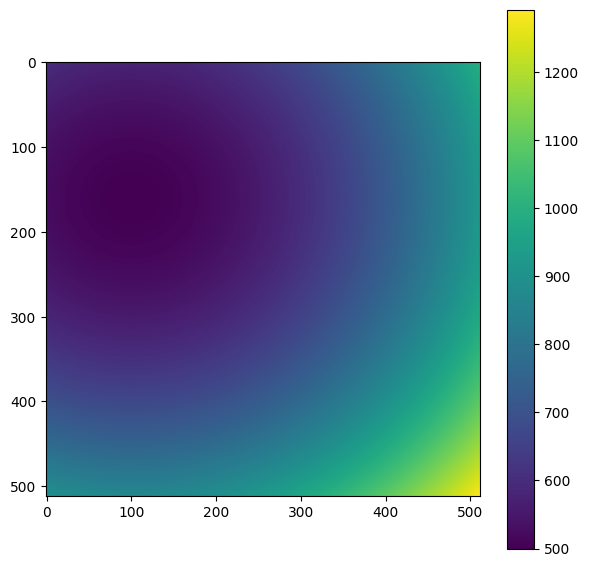

In [4]:
vel = np.fromfile(f_vel, dtype=np.float32).reshape((n1))
image(vel.reshape((nx, nz)))

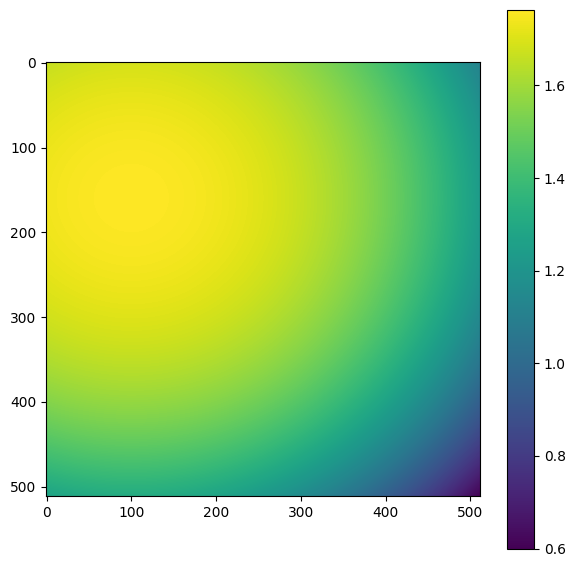

In [5]:
coeff = np.fromfile(f_coe, dtype=np.float32).reshape((13, n1))
image(coeff[0].reshape((nx, nz)))

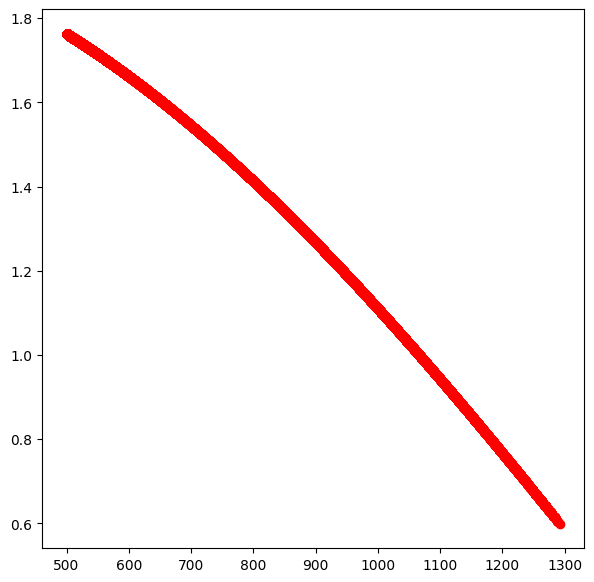

In [6]:
begin = 0
num = 512 * 512

sorted_indices = np.argsort(vel)
sorted_vel = vel[sorted_indices]
sorted_coeff = coeff[0][sorted_indices]

unique_vel, unique_indices = np.unique(sorted_vel, return_index=True)
unique_coeff = sorted_coeff[unique_indices]

plot(sorted_vel[begin:begin + num:1], sorted_coeff[begin:begin + num:1])

(106952,)


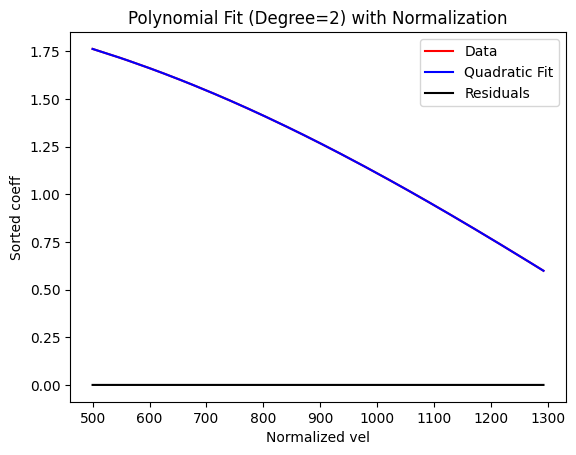

In [7]:
cs = CubicSpline(unique_vel, unique_coeff, bc_type="natural")
x_fit = np.linspace(sorted_vel[0], sorted_vel[-1], n1)
y_fit = cs(sorted_vel)

print(cs.c[0].shape)

plt.plot(sorted_vel, sorted_coeff, color="red", label="Data")  # 原始数据
plt.plot(sorted_vel, y_fit, color="blue", label="Quadratic Fit")  # 拟合曲线
plt.plot(sorted_vel, sorted_coeff - y_fit, color="black", label="Residuals")
plt.xlabel("Normalized vel")
plt.ylabel("Sorted coeff")
plt.legend()
plt.title("Polynomial Fit (Degree=2) with Normalization")
plt.show()

-0.0009637597386725526 1.0868882308622982


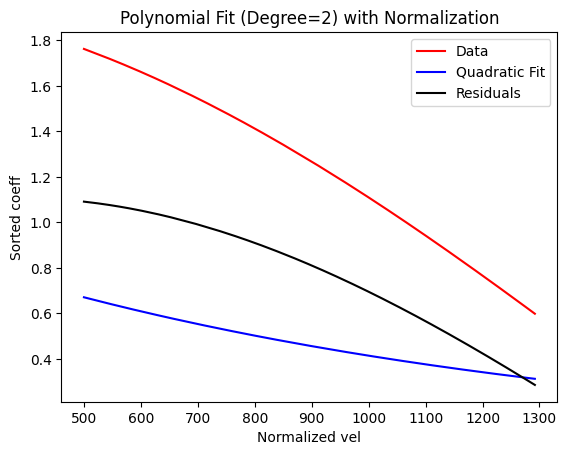

In [18]:
coeff_log = np.log(sorted_coeff)
coeffs = np.polyfit(sorted_vel, coeff_log, 1)
print(coeffs[0], coeffs[1])
coeff_fit_by_log = np.exp(np.log(coeffs[1]) + coeffs[0] * sorted_vel)

plt.plot(sorted_vel, sorted_coeff, color="red", label="Data")  # 原始数据
plt.plot(sorted_vel, coeff_fit_by_log, color="blue", label="Quadratic Fit")  # 拟合曲线
plt.plot(sorted_vel, sorted_coeff - coeff_fit_by_log, color="black", label="Residuals")
plt.xlabel("Normalized vel")
plt.ylabel("Sorted coeff")
plt.legend()
plt.title("Polynomial Fit (Degree=2) with Normalization")
plt.show()

In [9]:
print(max(coeff[0]), min(coeff[0]))

1.7629608 0.59897524
